Guide: https://colab.research.google.com/drive/1o5A5dNhamjcOEgaA9FKM4OmlAZS84Z5o#scrollTo=f8f60b87
Exercise: https://4geeks.com/es/syllabus/spain-ds-pt-3/project/tutorial-de-proyecto-de-regresion-lineal

📝 Instructions:

Predict the cost of a person's health insurance
The important insurance company 4Geeks Insurance S.L. wants to calculate, based on physiological data of its clients, what will be the premium (cost) that each of them must assume. To do this, they have brought together a complete team of doctors and based on data from other companies and a particular study, they have managed to gather a set of data to train a predictive model. Calculate the cost of a person's health insurance (Charges) based on the physiological data of their clients, that is, the premium that each of the clients must assume.

✨Variables:

age. Age of primary beneficiary (numeric)
sex. Gender of primary beneficiary (categorical)
bmi. Body mass index (numeric)
children. Number of children/dependents covered by health insurance (numeric)
smoker. Are you a smoker? (categorical)
region. Beneficiary's residential area in the USA: northeast, southeast, southwest, northwest (categorical)
charges. Health insurance premium (numeric)

Data Ingestion

In [1]:
import pandas as pd
url = "https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv"
total_data = pd.read_csv(url)
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


1️⃣Stage 1: Analisis Estadístico de los datos

🕵️‍♀️Paso 1. Exploracion y limpieza de datos

In [2]:
# Finding the number of rows and columns in the dataset
total_data.shape

(1338, 7)

In [6]:
# Get information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


✅Existen un total de 1338 filas distribuidas en 7 columnas. Entre las que encontramos la clase target a predecir, charges. 

✅Los datos cuenta con 4 características númericas y 3 categóricas.

In [7]:
#Removing duplicate values
duplicates = total_data[total_data.duplicated()]
print("Duplicates Values:")
print(duplicates)

total_data = total_data.drop_duplicates()
print("Deleted Duplicates Values:")

Duplicates Values:
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []
Deleted Duplicates Values:


In [6]:
#Deletion of relevant information; In this case it does not apply 👉 We keep all the dataset columns

Analysis of measures of central tendency, dispersion, position and shapes

Optative: Unique Values.

In [8]:
#Method 1
for column in total_data.columns:
    column_sum = total_data[column].sum()
    print(f"Sum of values ​​in column {column}: {column_sum}")


Sum of values ​​in column age: 52440
Sum of values ​​in column sex: femalemalemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalefemalemalemalefemalemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalefemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalemale

In [10]:
#Lambda method
# Define the lambda function
sum_column_lambda = lambda column: f"Sum of values ​​in column {column}: {total_data[column].sum()}"

# Apply lambda function to each column using map
result = list(map(sum_column_lambda, total_data.columns))

# Print the results
for res in result:
    print(res)

Sum of values ​​in column age: 52440
Sum of values ​​in column sex: femalemalemalemalemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalefemalemalemalemalefemalefemalemalefemalemalefemalefemalefemalemalemalemalefemalefemalemalemalemalefemalemalemalemalefemalefemalemalefemalemalemalefemalefemalefemalemalefemalefemalemalemalefemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalefemalemalefemalemalefemalemalefemalemalemalemalefemalemalefemalefemalemalefemalemalefemalefemalemalefemalefemalefemalefemalefemalefemalemalemalefemalefemalefemalemalemalemalefemalemalefemalefemalefemalemalefemalemalemalemalemalefemalemalefemalemalemalemalefemalefemalefemalemalemalefemalemalefemalefemalefemalefemalefemalemalefemalefemalefemalemalefemalefemalemalemalefemalefemalemalemalemalemalemalefemalemalefemalefemalemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalefemalemalemalefemalefemalefemalemalemalemalemalefemalefemalefemalemalemalefemalefemalemalefemalemalefemalemalemale

In [7]:
total_data.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#Alternative to .describe() to work in more detail
#Analysis of mean, mode, std and percentiles on numerical values
total_data = pd.DataFrame(total_data)

# Filter only numeric columns
columnas_numericas = total_data.select_dtypes(include=['int64', 'float64'])

columnas_numericas.describe() #shortcut

# Mean
media = columnas_numericas.mean()
print("Mean:")
print(media)

# Mode
moda = columnas_numericas.mode().iloc[0]  # Puede haber múltiples modas
print("\nMode:")
print(moda)

# Std deviation
desviacion_estandar = columnas_numericas.std()
print("\nDesviación Estándar:")
print(desviacion_estandar)

# Percentiles
percentiles = [0.25, 0.50, 0.75]
percentiles_resultados = columnas_numericas.quantile(percentiles)
print("\nPercentils:")
print(percentiles_resultados)

Mean:
age            39.222139
bmi            30.663452
children        1.095737
charges     13279.121487
dtype: float64

Mode:
age           18.0000
bmi           32.3000
children       0.0000
charges     1121.8739
Name: 0, dtype: float64

Desviación Estándar:
age            14.044333
bmi             6.100468
children        1.205571
charges     12110.359656
dtype: float64

Percentils:
       age    bmi  children      charges
0.25  27.0  26.29       0.0   4746.34400
0.50  39.0  30.40       1.0   9386.16130
0.75  51.0  34.70       2.0  16657.71745


🕵️‍♀️ Stage 2: Exploratory data analysis

2.1 Univariate analysis (column by column)

In [11]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Categorical univariate analysis

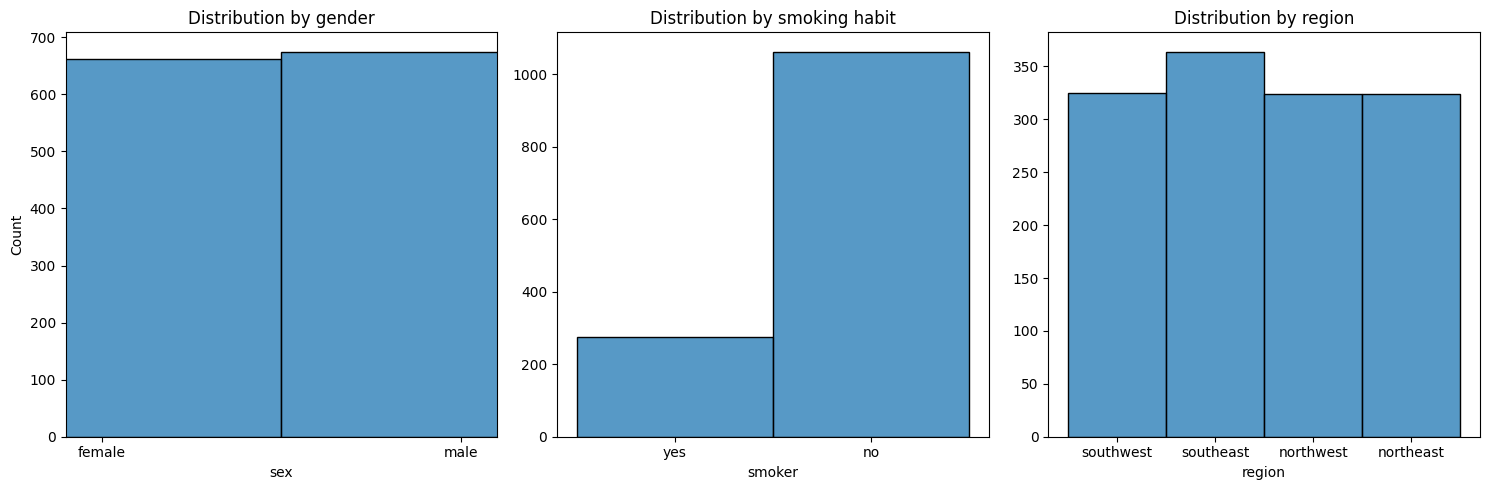

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a subplot with three histograms
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogram for 'sex'
sns.histplot(ax=axes[0], data=total_data, x="sex").set_xlim(-0.1, 1.1)
axes[0].set_title('Distribution by gender')

# Histogram for 'smoker'
sns.histplot(ax=axes[1], data=total_data, x="smoker").set(ylabel=None)
axes[1].set_title('Distribution by smoking habit')

# Histogram for 'region'
sns.histplot(ax=axes[2], data=total_data, x="region").set(ylabel=None)
axes[2].set_title('Distribution by region')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()



Conclusions from the categorical univariate analysis (Number of repetitions)

✅The distribution by gender is quite similar, although the sample of men is significantly higher than the sample of women,
✅The distribution by smoking habit is significant, the number of non-smokers almost quadruples that of smokers
✅The distribution by region is symmetrical between southwest, northwest and northeast and is significantly higher in the case of southeast

Numerical univariate analysis

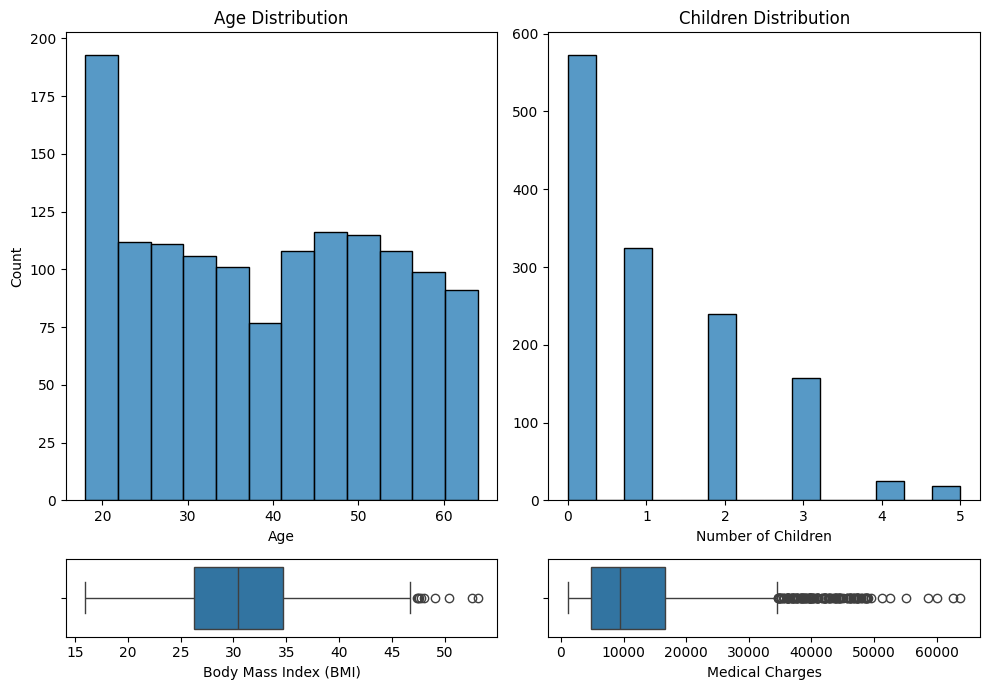

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a multiple subplot with histograms and box plots
fig, axis = plt.subplots(2, 2, figsize=(10, 7), gridspec_kw={'height_ratios': [6, 1]})

# Histogram for 'age'
sns.histplot(ax=axis[0, 0], data=total_data, x="age").set(xlabel=None)
axis[0, 0].set_title('Age Distribution')
axis[0, 0].set_xlabel('Age')

# Boxplot for 'bmi'
sns.boxplot(ax=axis[1, 0], data=total_data, x="bmi")
axis[1, 0].set_xlabel('Body Mass Index (BMI)')

# Histogram for 'children'
sns.histplot(ax=axis[0, 1], data=total_data, x="children").set(xlabel=None, ylabel=None)
axis[0, 1].set_title('Children Distribution')
axis[0, 1].set_xlabel('Number of Children')

# Boxplot for 'charges'
sns.boxplot(ax=axis[1, 1], data=total_data, x="charges")
axis[1, 1].set_xlabel('Medical Charges')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


🧐Conclusiones del análisis univariable numérico:

✅Edad: Claramente aparecen un mayor número de veinteañeros en la muestra

✅Número de hijos: La muestra contiene un mayor número de 0 hijos y va decreciendo

✅BMI: Parecen existir outliers entre 47 y 57 

✅Cargos Médicos (charges): La mayor concentración se produce entre 10000 y 15000, existiendo outliers por encima de 60000, parecen no existir valores entre 15000 y 35000

2.2 Multivariate analysis (Analysis of variables in relation to the predictor, that is, dependent with independent)

In [13]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Numerical numerical analysis

We will use the variable charges to begin the bivariate analysis 👉 charges vs age

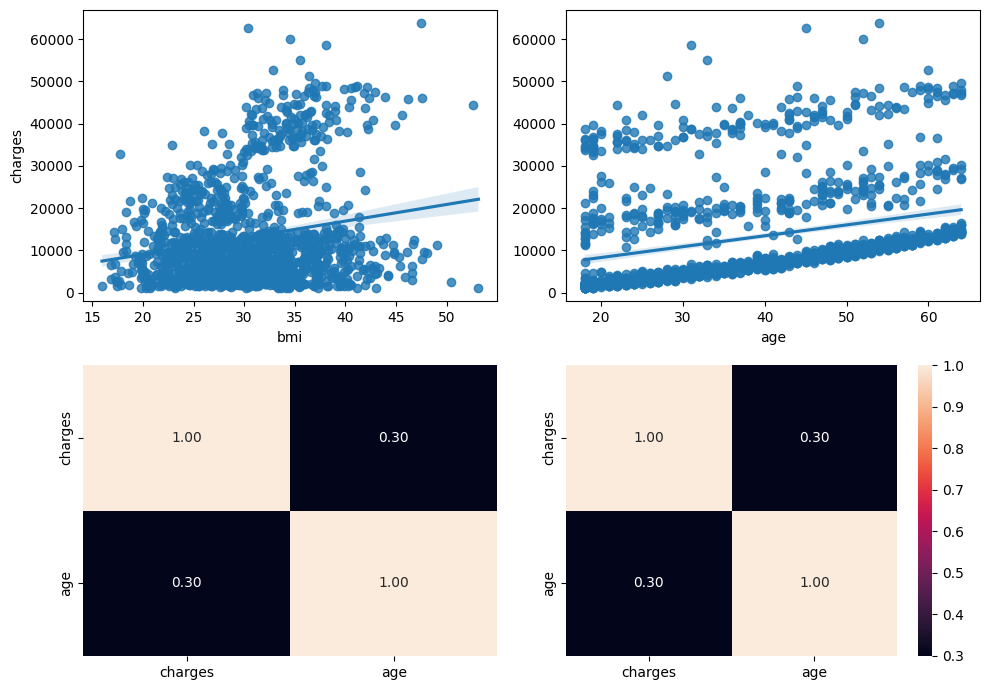

In [14]:
# Numeric analysis
# We will use the 'charges' variable to start the bivariate analysis 👉 charges vs age
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a multiple scatter plot
sns.regplot(ax=axis[0, 0], data=total_data, x="bmi", y="charges")
sns.heatmap(total_data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=total_data, x="age", y="charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "age"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


Conclusion 👉 There is a not very strong relationship between age and the price of the premium, that is, the significance is not very high (30%)

Children vs charges correlation

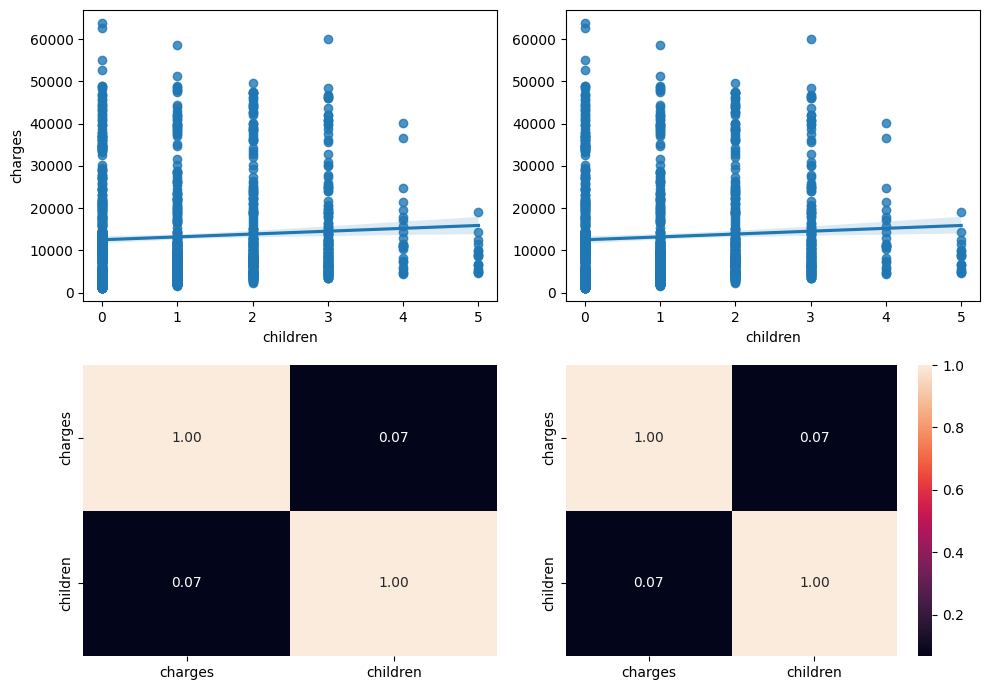

In [15]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a multiple scatter plot
sns.regplot(ax=axis[0, 0], data=total_data, x="children", y="charges")
sns.heatmap(total_data[["charges", "children"]].corr(), annot=True, fmt=".2f", ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=total_data, x="children", y="charges").set(ylabel=None)
sns.heatmap(total_data[["charges", "children"]].corr(), annot=True, fmt=".2f", ax=axis[1, 1])

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


The correlation between the cost of the premium and whether the insured has children is very low, 7%, therefore it is not significant.

👴🧓age - 👼children

Next we can also relate both variables to determine their degree of affinity or correlation.

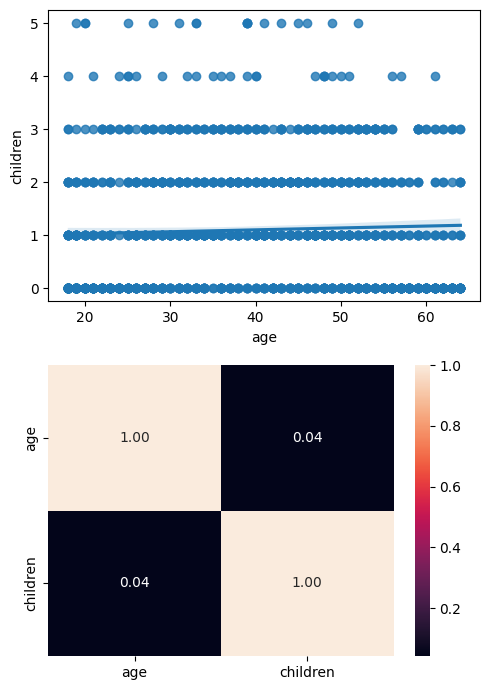

In [16]:
fig, axis = plt.subplots(2, 1, figsize = (5, 7))

# Create a multiple scatterplot
sns.regplot(ax = axis[0], data = total_data, x = "age", y = "children")
sns.heatmap(total_data[["age", "children"]].corr(), annot = True, fmt = ".2f", ax = axis[1])

# Adjust the layout
plt.tight_layout()

# Mostrar el plot
plt.show()

It can be determined that there is not a very strong relationship between both variables and that age does not impact whether the number of children is greater or not, thinking about it, it is logical.

In [17]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Categorical-categorical analysis

When the two variables being compared have categorical data, the analysis is said to be categorical-categorical. To compare two numerical columns, histograms and combinations are used.

💰 charges - (sex, smoker, region)
We first analyze the class against the categorical features, one by one. Here there will be no combinations of several predictors and the class

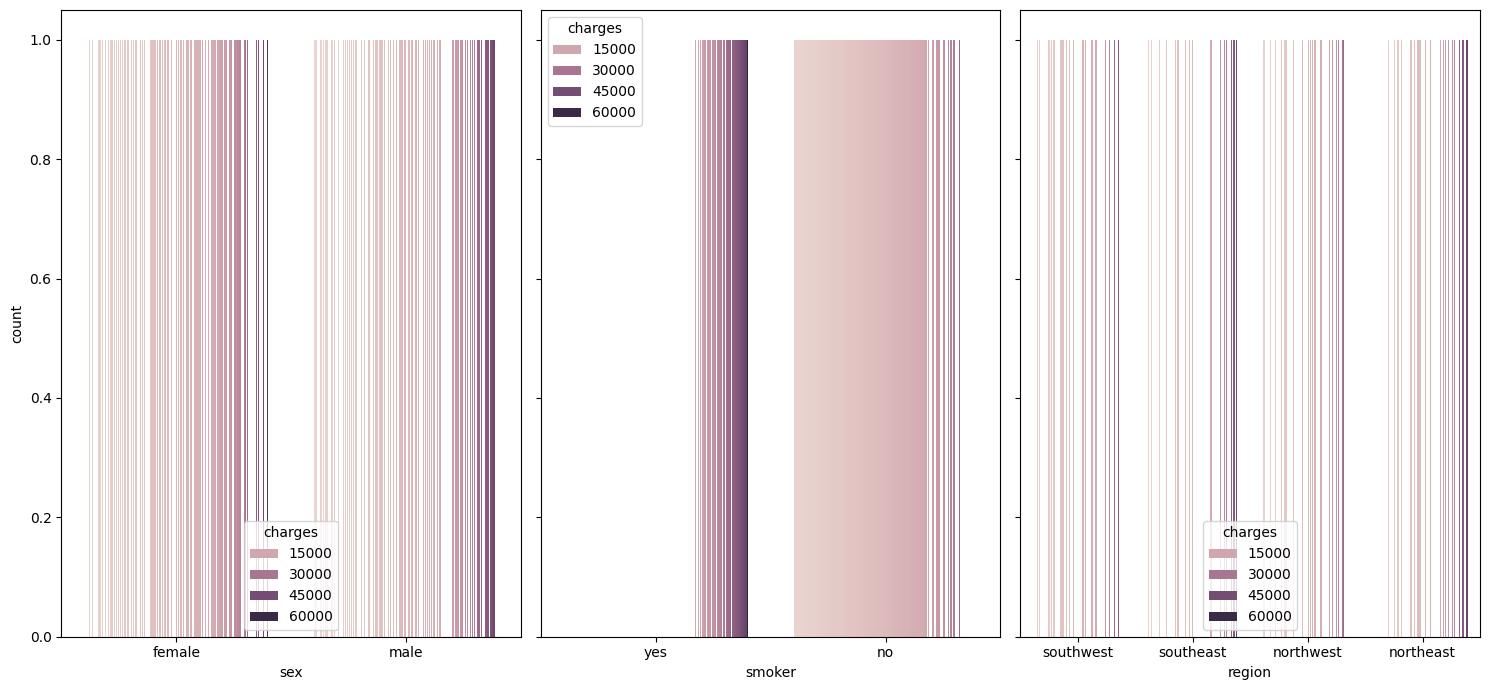

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize=(15, 7), sharey=True)  # #Share axis

sns.countplot(ax=axis[0], data=total_data, x="sex", hue="charges")
sns.countplot(ax=axis[1], data=total_data, x="smoker", hue="charges").set(ylabel=None)
sns.countplot(ax=axis[2], data=total_data, x="region", hue="charges").set(ylabel=None)

plt.tight_layout()
plt.show()

Del anterior gráfico se deriva lo siguiente:
La prima de seguro es más elevada en hombres que en mujeres
La prima del seguro es mas elevada en fumadores que en no fumadores
Las regiones con primas mas elevadas son southeast y northeast

Combinaciones de la clase con varias predictoras
Vamos a combinar sex y smoker con la variable máster para enriquecer el análisis 

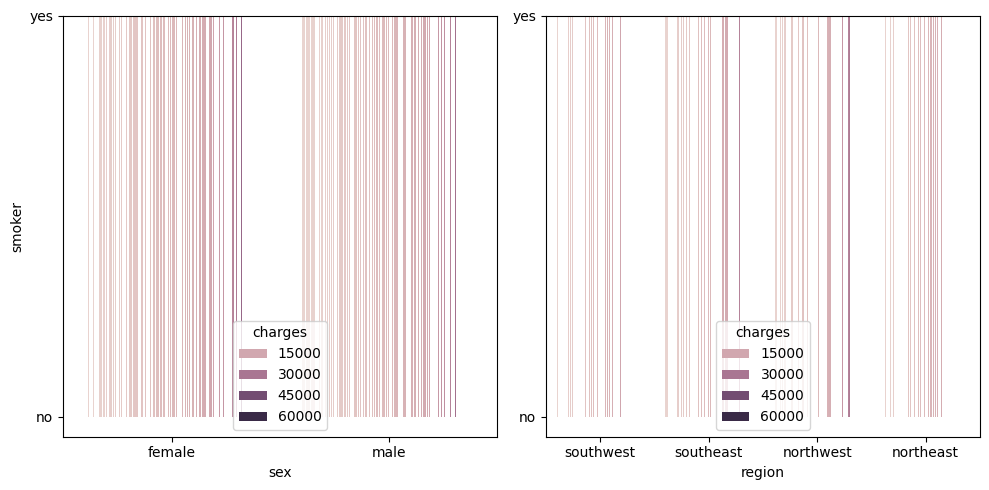

In [19]:
fig, axis = plt.subplots(figsize = (10, 5), ncols = 2)

sns.barplot(ax = axis[0], data = total_data, x = "sex", y = "smoker", hue = "charges")
sns.barplot(ax = axis[1], data = total_data, x = "region", y = "smoker", hue = "charges").set(ylabel = None)

plt.tight_layout()

plt.show()

Correlation analysis 👉 Multivariate analysis also allows combining the class with several predictors at the same time to enrich the analysis

The pd.factorize() function in Pandas is used to perform factor encoding on categorical data. Factor coding is the process of assigning a unique integer to each unique category present in a column of categorical data, it allows us to perform correlation analysis by comparing numerical and categorical values.

In [19]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


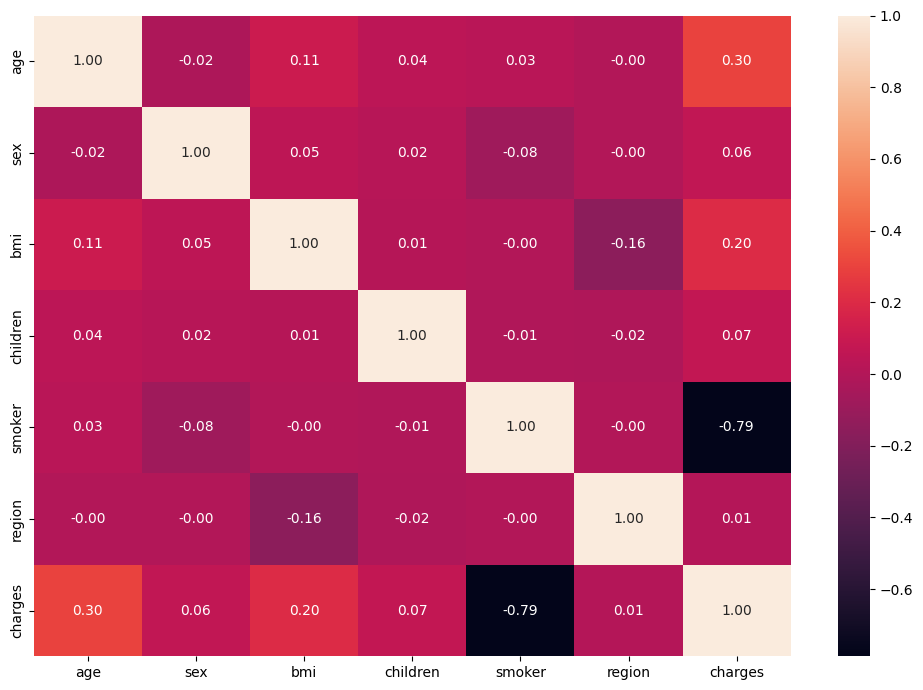

In [20]:
total_data["sex"] = pd.factorize(total_data["sex"])[0]
total_data["smoker"] = pd.factorize(total_data["smoker"])[0]
total_data["region"] = pd.factorize(total_data["region"])[0]

fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker", "region", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

The correlation analysis reflects:

✅There is a strong direct relationship between the premium (charge) and whether the insured is a smoker or non-smoker (79%)

✅There is a weak relationship between the premium (charge) and the insured's bmi (20%)

✅There is a weak relationship between the premium (charge) and the age of the insured (30%)

Numerical-categorical analysis (complete)

This is the most detailed analysis that we can carry out. To do this, we simply have to calculate the correlations between the variables, since it is the greatest indication of the relationships. Thus, once we verify that there is some relationship, we can delve deeper into the study.

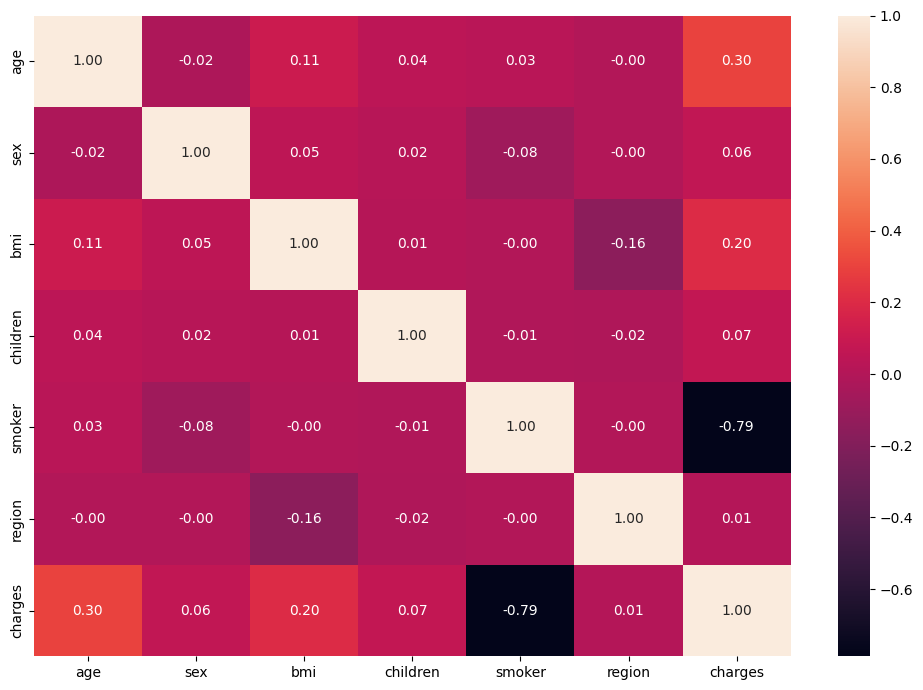

In [21]:
fig, axis = plt.subplots(figsize = (10, 7))

sns.heatmap(total_data[["age", "sex", "bmi", "children", "smoker", "region", "charges"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

It is confirmed that there is a strong direct relationship between the premium(charge) and whether the insured is a smoker or non-smoker (79%)

In [22]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


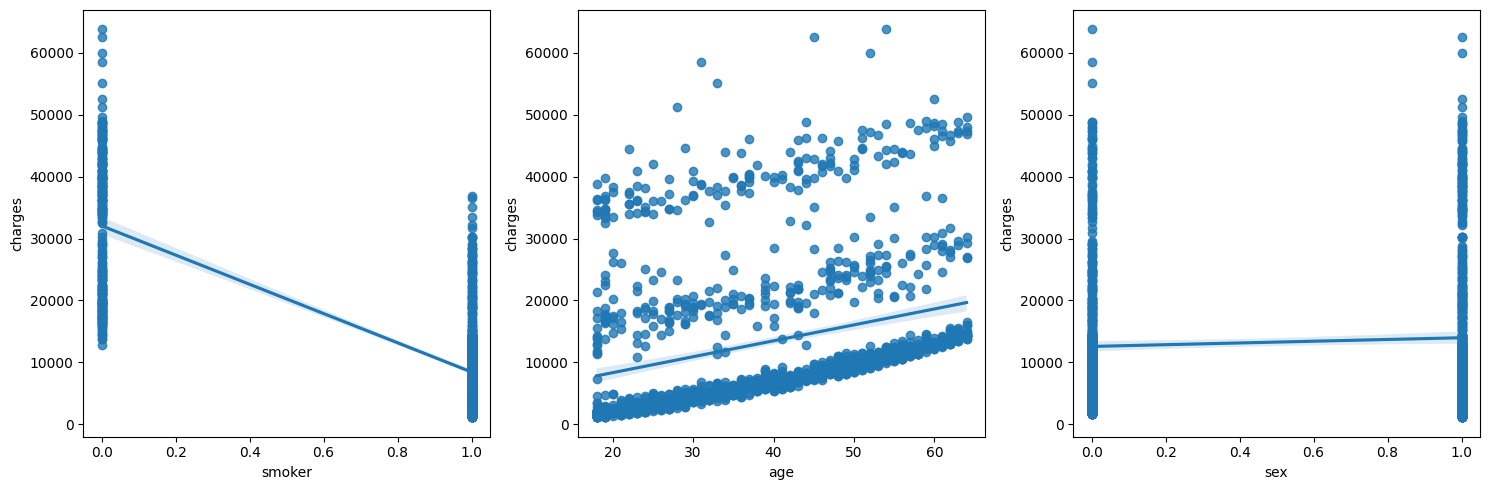

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize=(15, 5), ncols=3)

sns.regplot(ax=axis[0], data=total_data, x="smoker", y="charges")
sns.regplot(ax=axis[1], data=total_data, x="age", y="charges")
sns.regplot(ax=axis[2], data=total_data, x="sex", y="charges")

plt.tight_layout()
plt.show()

Smoker 👉 According to the coefficient obtained for the variable "smoker", which is -23609.57, it can be interpreted that being a smoker is associated with an increase in medical charges (premium). Specifically, the negative value of the coefficient indicates that, on average, medical charges decrease by $23,609.57 when the "smoker" variable is changed from smoker to non-smoker and vice versa.

Age 👉 Medical charges expected to increase on average by $1,405.42 women to men

Sex 👉 There is a greater correlation between the male sex and a higher premium than if the client is a woman.


Pair Plot

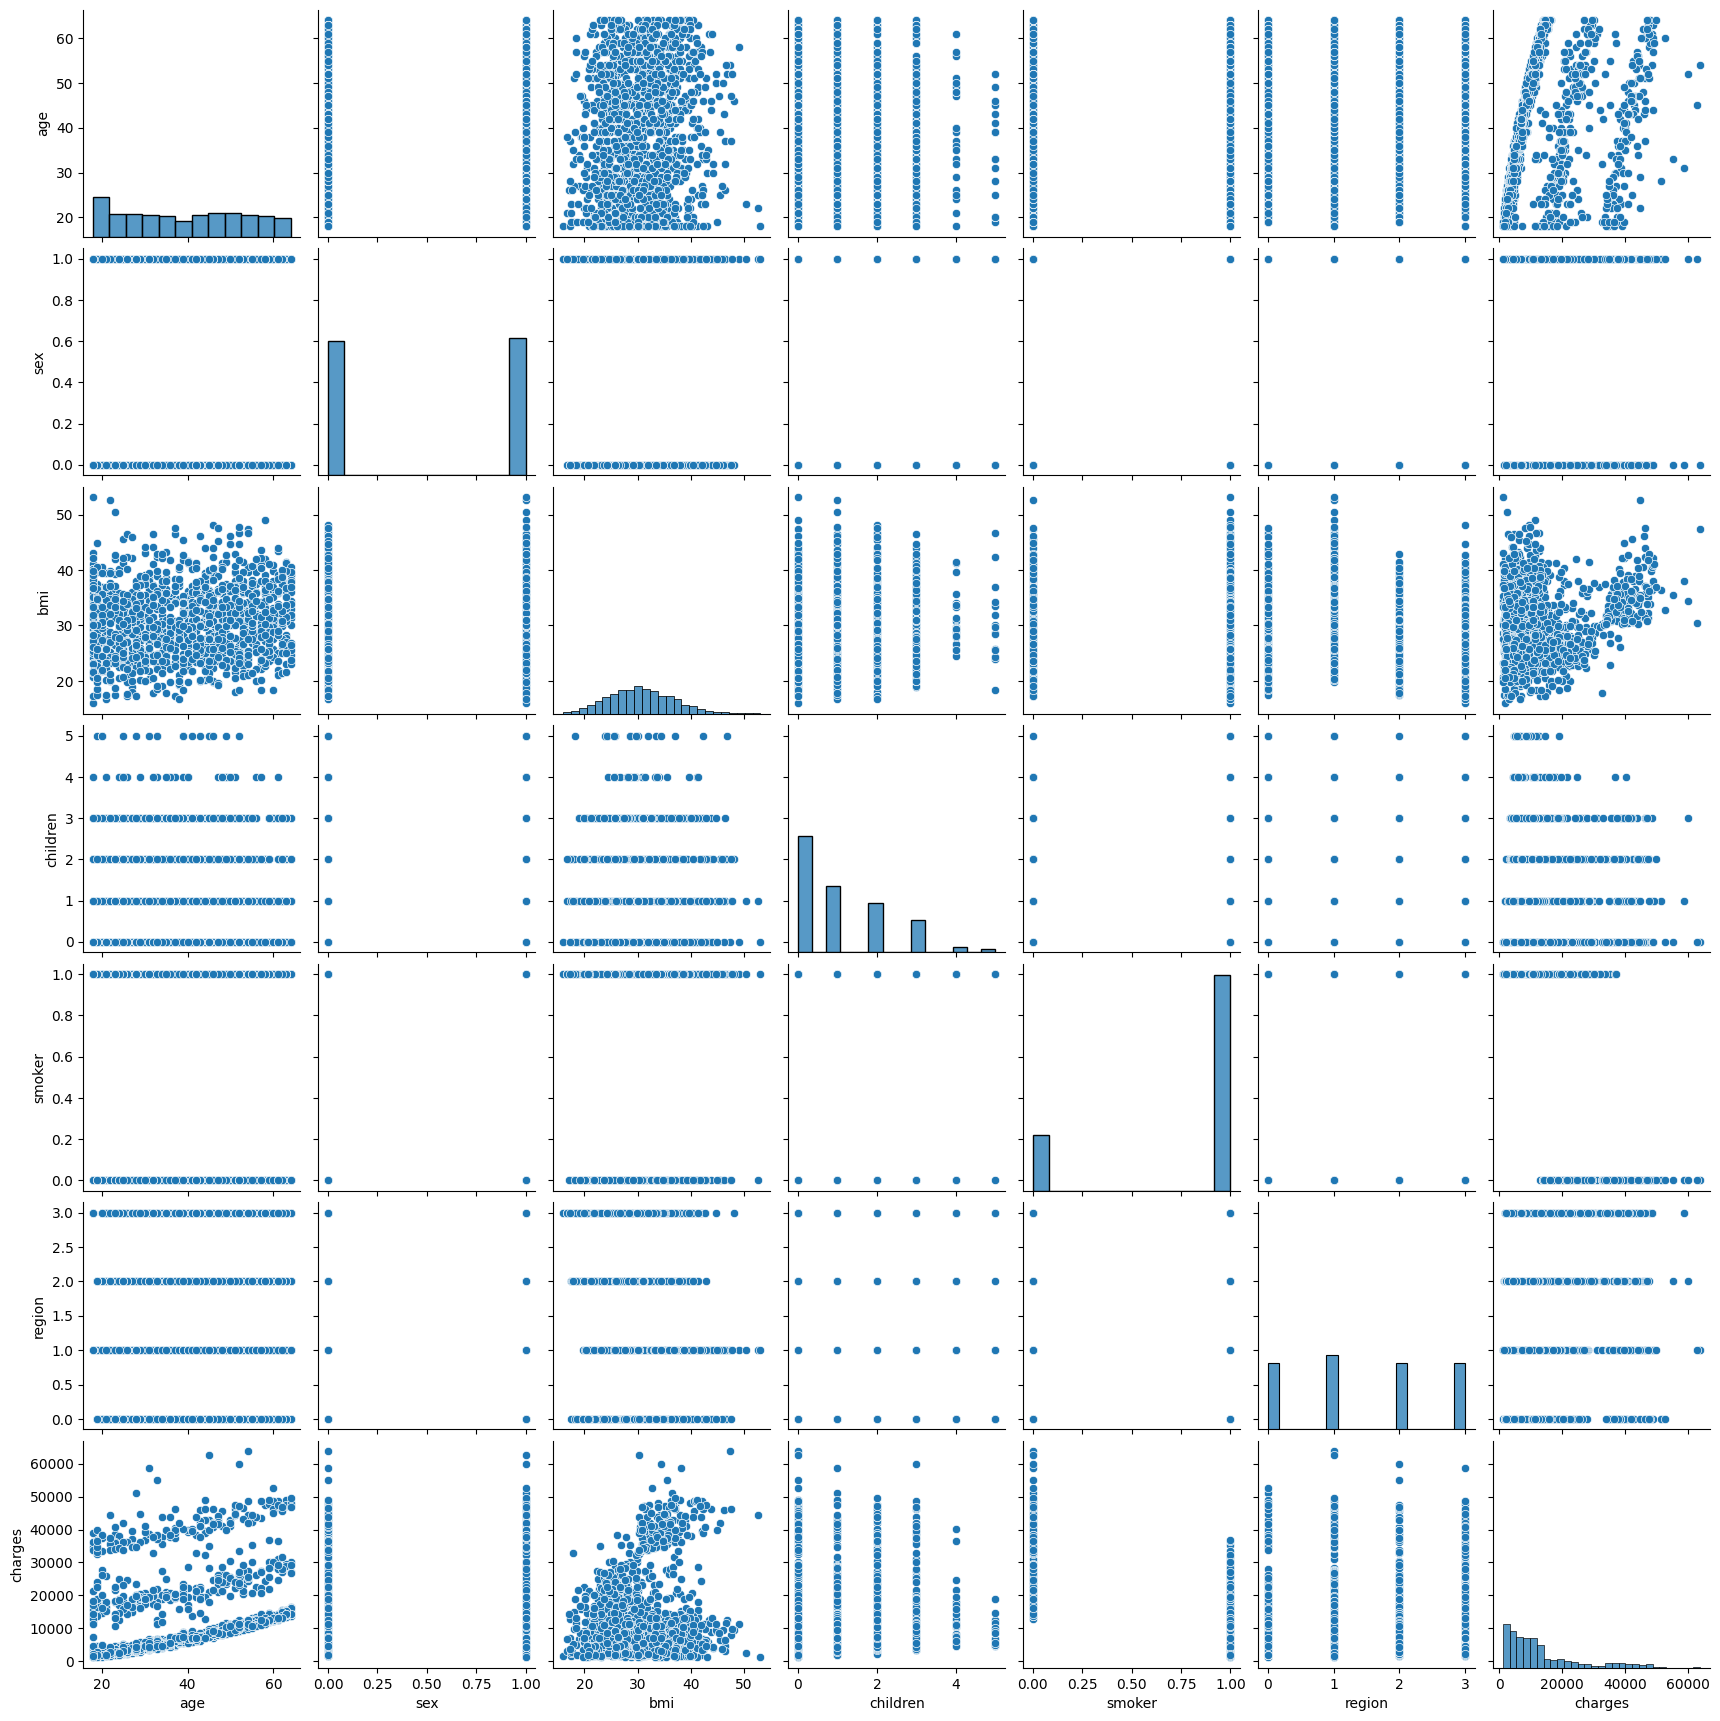

In [24]:
sns.pairplot(data = total_data)

👨‍🏫 Stage 3. Machine Learning

Before doing the splits, we do the featuring engineering

In [25]:
#Outlier analysis 👉 Through descriptive analysis
total_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.795064,1.483919,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,1.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,1.000000,1.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,1.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [26]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


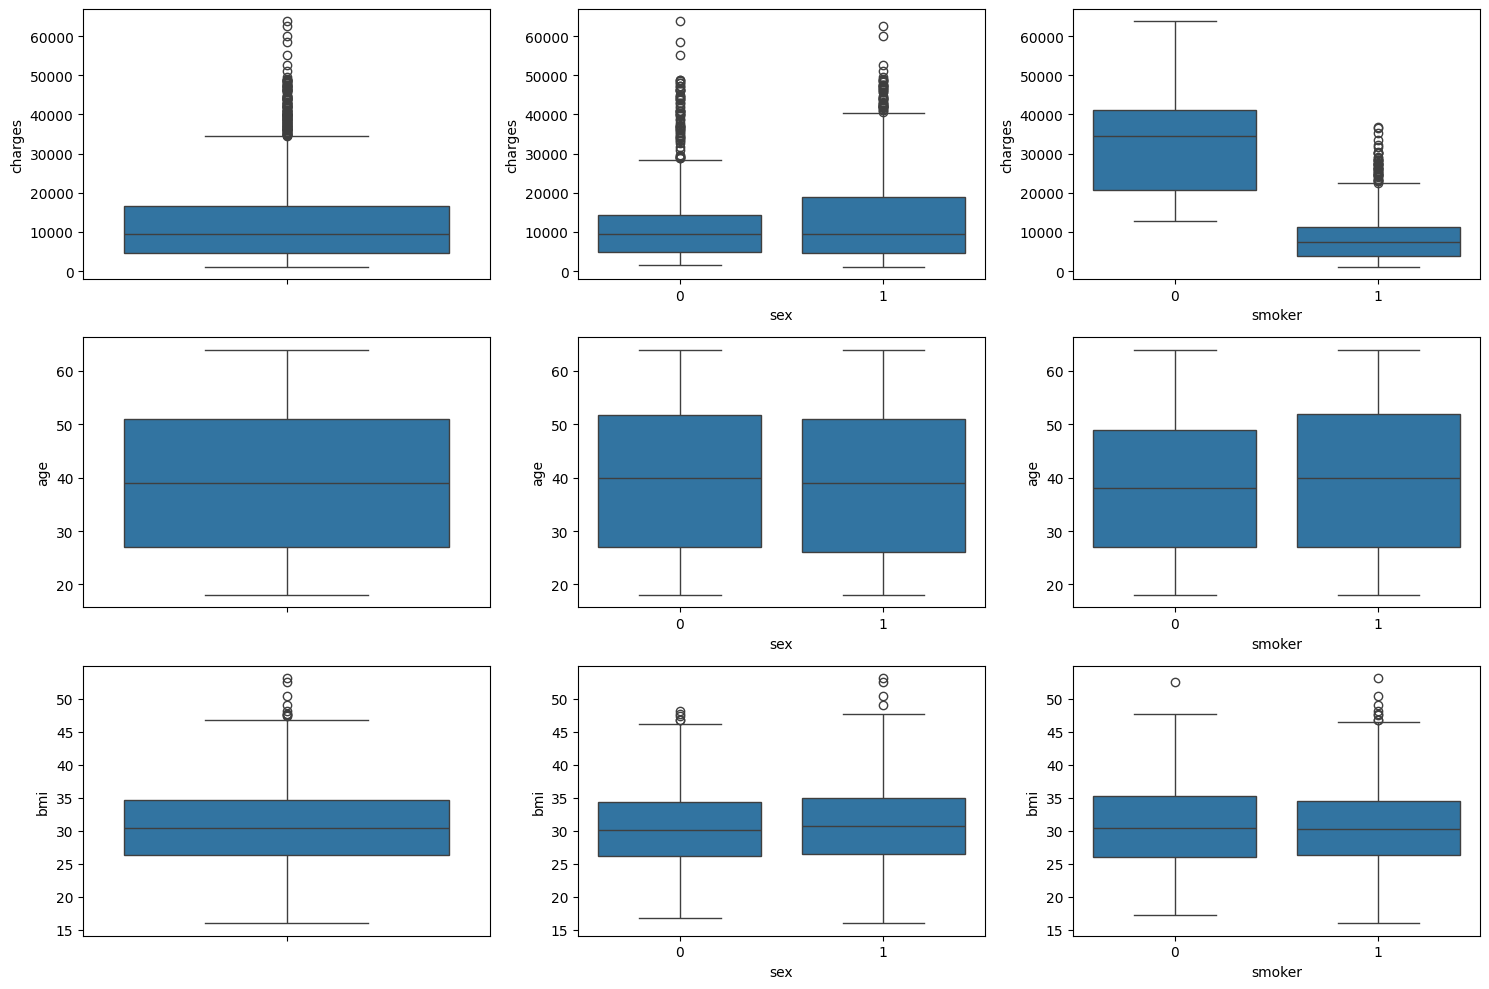

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots for outliers detection
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axes[0, 0], data=total_data, y="charges")
sns.boxplot(ax=axes[0, 1], data=total_data, x="sex", y="charges")
sns.boxplot(ax=axes[0, 2], data=total_data, x="smoker", y="charges")
sns.boxplot(ax=axes[1, 0], data=total_data, y="age")
sns.boxplot(ax=axes[1, 1], data=total_data, x="sex", y="age")
sns.boxplot(ax=axes[1, 2], data=total_data, x="smoker", y="age")
sns.boxplot(ax=axes[2, 0], data=total_data, y="bmi")
sns.boxplot(ax=axes[2, 1], data=total_data, x="sex", y="bmi")
sns.boxplot(ax=axes[2, 2], data=total_data, x="smoker", y="bmi")

plt.tight_layout()

plt.show()

We will not clean outliers following statistics (never, ever touch the data in the target column, in this case it is charges)

In [56]:
'''import numpy as np

stats = total_data.describe()

# Lista de variables para las cuales deseas calcular los límites
variables = ["age", "sex", "bmi", "children", "smoker", "region"]

for variable in variables:
    variable_stats = stats[variable]
    variable_iqr = variable_stats["75%"] - variable_stats["25%"]
    upper_limit = variable_stats["75%"] + 1.5 * variable_iqr
    lower_limit = variable_stats["25%"] - 1.5 * variable_iqr

    print(f"Para {variable}:")
    print(f"Límites superior e inferior para la búsqueda de outliers: {round(upper_limit, 2)} y {round(lower_limit, 2)}")
    print(f"Rango intercuartílico: {round(variable_iqr, 2)}\n")'''



Para age:
Límites superior e inferior para la búsqueda de outliers: 87.0 y -9.0
Rango intercuartílico: 24.0

Para sex:
Límites superior e inferior para la búsqueda de outliers: 2.5 y -1.5
Rango intercuartílico: 1.0

Para bmi:
Límites superior e inferior para la búsqueda de outliers: 47.32 y 13.67
Rango intercuartílico: 8.41

Para children:
Límites superior e inferior para la búsqueda de outliers: 5.0 y -3.0
Rango intercuartílico: 2.0

Para smoker:
Límites superior e inferior para la búsqueda de outliers: 1.0 y 1.0
Rango intercuartílico: 0.0

Para region:
Límites superior e inferior para la búsqueda de outliers: 3.5 y -0.5
Rango intercuartílico: 1.0



In [67]:
'''Eliminación de outliers a partir del rango intercuartílico

# Eliminar outliers para age
total_data = total_data[(total_data['age'] >= -9.0) & (total_data['age'] <= 87.0)]

# Eliminar outliers para sex
total_data = total_data[(total_data['sex'] >= -1.5) & (total_data['sex'] <= 2.5)]

# Eliminar outliers para bmi
total_data = total_data[(total_data['bmi'] >= 13.67) & (total_data['bmi'] <= 47.32)]

# Eliminar outliers para children
total_data = total_data[(total_data['children'] >= -3.0) & (total_data['children'] <= 5.0)]

# Eliminar outliers para smoker
total_data = total_data[(total_data['smoker'] >= 1.0) & (total_data['smoker'] <= 1.0)]

# Eliminar outliers para region
total_data = total_data[(total_data['region'] >= -0.5) & (total_data['region'] <= 3.5)]'''


Analysis of missing values 👉 A missing value is a space that has no value assigned in the observation of a specific variable.

In [28]:
total_data.isnull().sum().sort_values(ascending=False)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

👀 We observe that there are no null values ​​and no inference of new characteristics will be made.

In [29]:
total_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,0,16884.92400
1,18,1,33.770,1,1,1,1725.55230
2,28,1,33.000,3,1,1,4449.46200
3,33,1,22.705,0,1,2,21984.47061
4,32,1,28.880,0,1,2,3866.85520


Divide the data set into train and test and save them 👉 A random state must be included.

We do not employ stratify, since there is at least one class in your tags (y) that has only one member, and this is causing a problem when trying to stratify the data sets.


In [30]:
from sklearn.model_selection import train_test_split
import pandas as pd

num_variables = ["age", "sex", "bmi", "children", "smoker", "region"]


# Split the data set into training and testing samples
X = total_data.drop("charges", axis=1)[num_variables]
y = total_data["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save training and test sets to CSV files
X_train.to_csv("insurance_train_X.csv", index=False)
X_test.to_csv("insurance_test_X.csv", index=False)

# Save training and test set labels to CSV files
y_train.to_csv("insurance_train_y.csv", index=False)
y_test.to_csv("insurance_test_y.csv", index=False)

X_train.head()


,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,1,3
968,21,1,25.745,2,1,3
599,52,0,37.525,2,1,2
170,63,1,41.470,0,1,1
275,47,0,26.600,2,1,3


💥Splitting the train and test data set after feature normalization using the StandardScaler.

✅In this case, as it is a regression, it is normal to have negative and positive levels. If it were a classification you cannot have negatives.

In [32]:
# Standard Scaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from pickle import dump

num_variables = ["age", "sex", "bmi", "children", "smoker", "region"]

# Select features (X) and labels (y)
X = total_data[num_variables]
y = total_data["charges"]

# Split the dataset into training and testing samples with random_state and stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Does not accept stratification since there is a class in your labels (y) that has only one member, causing an issue when trying to stratify the datasets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and fit the scaler on the training set
scaler = StandardScaler()
scaler.fit(X_train)

# Transform the training and testing sets
X_train_norm = scaler.transform(X_train)
X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=num_variables)

X_test_norm = scaler.transform(X_test)
X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=num_variables)

# Save the normalized training and testing sets to CSV files
X_train_norm.to_csv("insurance_train_X_norm.csv", index=False)
X_test_norm.to_csv("insurance_test_X_norm.csv", index=False)

# Save the scaler for future use
dump(scaler, open("norm_scaler_insurance.pk", "wb"))

X_train_norm.head()



,age,sex,bmi,children,smoker,region
1114,-1.157680,0.971409,-0.996928,-0.907908,0.500292,1.383946
968,-1.300619,0.971409,-0.792762,0.766904,0.500292,1.383946
599,0.914926,-1.029432,1.154664,0.766904,0.500292,0.477983
170,1.701087,0.971409,1.806837,-0.907908,0.500292,-0.427981
275,0.557580,-1.029432,-0.651417,0.766904,0.500292,1.383946


Min Max Scaler

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from pickle import dump

num_variables = ["age", "sex", "bmi", "children", "smoker", "region"]

# Select features (X) and labels (y)
X = total_data[num_variables]
y = total_data["charges"]

# Split the dataset into training and testing samples with random_state and stratify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Does not accept stratification since there is a class in your labels (y) that has only one member, causing an issue when trying to stratify the datasets. In the context of train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Create the MinMaxScaler object
minmax_scaler = MinMaxScaler()

# Fit the scaler with the training data
minmax_scaler.fit(X_train)

# Apply the transformation to the training and testing sets
X_train_minmax = minmax_scaler.transform(X_train)
X_train_minmax = pd.DataFrame(X_train_minmax, index=X_train.index, columns=num_variables)

X_test_minmax = minmax_scaler.transform(X_test)
X_test_minmax = pd.DataFrame(X_test_minmax, index=X_test.index, columns=num_variables)

# Save the normalized sets to CSV files
X_train_minmax.to_csv("insurance_train_X_minmax.csv", index=False)
X_test_minmax.to_csv("insurance_test_X_minmax.csv", index=False)

# Save the min-max scaler
dump(minmax_scaler, open("minmax_scaler_insurance.pk", "wb"))

X_train_minmax.head()



,age,sex,bmi,children,smoker,region
1114,0.108696,1.0,0.230024,0.0,1.0,1.000000
968,0.065217,1.0,0.263250,0.4,1.0,1.000000
599,0.739130,0.0,0.580172,0.4,1.0,0.666667
170,0.978261,1.0,0.686306,0.0,1.0,0.333333
275,0.630435,0.0,0.286252,0.4,1.0,1.000000


In this particular case, regression must be used, since the problem is not classified, but rather involves predicting a continuous value or a numerical quantity.

The linear regression model uses normalized data from a training set to predict labels in a test set in the context of a health insurance project. The code fits the model, prints its coefficients and intercept, makes predictions, evaluates performance using Mean Squared Error (MSE) and Coefficient of Determination (R^2), and saves the trained model for future use.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import pickle

# Load normalized features and labels
X_train = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_normalized/insurance_train_X_norm.csv")
X_test = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_normalized/insurance_test_X_norm.csv")
y_train = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_split_no_normalized/insurance_train_y.csv")
y_test = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_split_no_normalized/insurance_test_y.csv")

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the intercept and coefficients
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

# Optional: Visualize predictions versus actual values
predictions_vs_actuals = pd.DataFrame({"Actual": y_test["charges"].values, "Predicted": y_pred.flatten()})
print(predictions_vs_actuals.head())

# Save the model to a file using pickle
with open("/workspace/Linear-Regression-Insurance-Project/models/linear_regression_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model successfully saved.")


Intercept (a): [13030.20336929]
Coefficients (b): [[ 3480.71806706   -49.82673307  1890.9752842    637.82776712
  -9224.0941585    262.2899979 ]]
Mean Squared Error (MSE): 35493102.61165053
Coefficient of Determination (R^2): 0.8068466322629111
        Actual     Predicted
0   8688.85885   8080.450186
1   5708.86700   5592.871120
2  11436.73815  14378.298655
3  38746.35510  31731.819541
4   4463.20510   9158.356944
Model successfully saved.


🚀Model Performance:

✅Mean Square Error (MSE):
MSE = 35,493,102.61
The MSE measures the mean of the squares of the differences between the actual values ​​and the model predictions. In this case, an MSE of this magnitude indicates that there is relatively high variability in the predictions.

✅Coefficient of Determination (R^2):
R^2 = 0.8068
The R^2 represents the proportion of the variance in the dependent variable that is predictable from the independent variables. An R^2 of 0.8068 suggests that the model explains approximately 80.68% of the variability in loading. This value is quite good, but there is still 19.32% unexplained variability.

👨‍💻 Model optimization

The code uses GridSearchCV to optimize a linear regression model with feature selection. Find the best number of features (6 in this case) and evaluate the performance of the model using the Mean Square Error (MSE) on the training data and the Coefficient of Determination (R^2) on the test data.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import pickle

# Load normalized features and labels
X_train = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_normalized/insurance_train_X_norm.csv")
X_test = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_normalized/insurance_test_X_norm.csv")
y_train = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_split_no_normalized/insurance_train_y.csv")
y_test = pd.read_csv("/workspace/Linear-Regression-Insurance-Project/data/interim/data_split_no_normalized/insurance_test_y.csv")

# Create the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the intercept and coefficients
print(f"Intercept (a): {model.intercept_}")
print(f"Coefficients (b): {model.coef_}")

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Coefficient of Determination (R^2): {r2}")

# Optional: Visualize predictions versus actual values
predictions_vs_actuals = pd.DataFrame({"Actual": y_test["charges"].values, "Predicted": y_pred.flatten()})
print(predictions_vs_actuals.head())

# Save the model to a file using pickle
with open("/workspace/Linear-Regression-Insurance-Project/models/optimized_linear_regression_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

print("Model successfully saved.")




Intercept (a): [13030.20336929]
Coefficients (b): [[ 3480.71806706   -49.82673307  1890.9752842    637.82776712
  -9224.0941585    262.2899979 ]]
Mean Squared Error (MSE): 35493102.61165053
Coefficient of Determination (R^2): 0.8068466322629111
        Actual     Predicted
0   8688.85885   8080.450186
1   5708.86700   5592.871120
2  11436.73815  14378.298655
3  38746.35510  31731.819541
4   4463.20510   9158.356944
Model successfully saved.


✅Best parameters: {'selector__k': 6}

Optimality achieved with the selection of 6 features by SelectKBest.

✅Training performance
👁‍🗨Mean square error (MSE) in training: 38772491.93

👁‍🗨The model has an MSE of approximately 38.7 million on the training data, indicating the discrepancy between the predictions and the actual values.

✅Test performance
👁‍🗨Determination coefficient (R^2) in test: 0.73

👁‍🗨The model explains about 73% of the variability in the test set.

👩‍🏫Conclusion:

🚀 Model Performance:

✅ Mean Square Error (MSE):
MSE = 35,493,102.61
The MSE, with a value of 35,493,102.61, indicates relatively high variability in the model predictions. The lower the MSE, the better the model's ability to fit the data.

✅Coefficient of Determination (R^2):
R^2 = 0.8068
An R^2 of 0.8068 suggests that the model explains approximately 80.68% of the variability in loading. This value is quite robust, but there is still 19.32% of unexplained variability.

🚀Model Optimization:

✅Best Parameters:
{'selector__k': 6}
Optimality achieved with the selection of 6 features by SelectKBest.

✅Training Performance:
Mean square error (MSE) in training: 38,772,491.93
The model has an MSE of approximately 38.7 million on the training data, indicating the discrepancy between the predictions and the actual values.
Test Performance:

✅Coefficient of determination (R^2) in test: 0.73
The model explains about 73% of the variability in the test set. An R^2 of this level is positive, although it leaves room to improve the predictive capacity of the model.

👨‍🏫Conclusion:

The linear regression model developed shows solid performance in estimating health insurance charges, although there are areas that could be improved. The Mean Square Error (MSE) of 35,493,102.61 indicates considerable variability in the predictions, suggesting that there is room to refine the accuracy of the model. The Coefficient of Determination (R^2) of 80.68% is encouraging, but there is still 19.32% of unexplained variability.

Optimal feature selection with SelectKBest, using 6 features, shows efficient model adaptation. However, performance on training data with an MSE of 38,772,491.93 highlights the need for additional tuning.

Overall, the model presents a solid foundation, but it is suggested that strategies be explored to reduce variability and improve predictive capacity. Optimizing hyperparameters and considering additional features could be fruitful areas for future improvements.